> # <font color=blue> Lead Scoring Case Study </font>

In [1]:
# import pandas, pd is an alias
import pandas as pd

# import numpy, np is an alias
import numpy as np

# import matplotlib.pyplot, plt is an alias
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Modeling 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#ignore Warning
import warnings
warnings.filterwarnings('ignore')

> # <font color=blue> 1. Data Sourcing </font>

> ## 1.1. Enter CSV Data File location

In [2]:
#Store File Location
Location = "./"

#Store Data File Name / csv File
FileName = "Leads.csv"

LocationLead = Location + FileName
print("File '{0}'' available in Location '{1}' will be used as DataSet".format(FileName,LocationLead))


File 'Leads.csv'' available in Location './Leads.csv' will be used as DataSet


> ## 1.2. Read CSV DataSet

In [3]:
#Print dataframe properly
pd.set_option('display.max_columns', 500)

#Read DataSet in CSV File Format and converting select into Null
dfLead = pd.read_csv(LocationLead, sep=',', encoding='utf-8',na_values=["Select","unknown"])

#Replace all nan value in dataset into null
dfLead.replace(to_replace = np.nan, value = '')  
dfLead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


> ## 1.3. Inspecting the DataFrame

In [4]:
#Return total number of Rows and Columns
dfLead.shape

(9240, 37)

In [5]:
#View some basic statistical details of a data frame 
dfLead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the dataSet model
dfLead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6774 non-null object
Specialization                                   5860 

> # <font color=blue> 2. Data Cleaning </font>

> ## 2.1. DataSet Invalid columns

> ### The below listed columns can be dropped as it holds Data as "No" only
> - Magazine
> - Receive More Updates About Our Courses
> - Update me on Supply Chain Content
> - Get updates on DM Content
> - I agree to pay the amount through cheque


In [7]:
# List columns have Data as "No"

columns = ["Magazine", "Receive More Updates About Our Courses","Update me on Supply Chain Content",
           "Get updates on DM Content","I agree to pay the amount through cheque",  ]

#Header
print("*" * 100)
print("| Column Name".ljust(47), '|', "Data Type", '|', "Null",'|', "Unique",'|', 
      "Sample Unique Records|")
print("*" * 100)

#Print Metadata content
for cols in columns:
    print('|', cols.ljust(45),'|' ,'%-9s'%(dfLead[cols].dtypes),'|' , 
          "{:<4d}".format(dfLead[cols].isnull().sum()),'|', "{:<6d}".format(dfLead[cols].nunique()),
          '|', dfLead[cols].unique()[0:4])


****************************************************************************************************
| Column Name                                   | Data Type | Null | Unique | Sample Unique Records|
****************************************************************************************************
| Magazine                                      | object    | 0    | 1      | ['No']
| Receive More Updates About Our Courses        | object    | 0    | 1      | ['No']
| Update me on Supply Chain Content             | object    | 0    | 1      | ['No']
| Get updates on DM Content                     | object    | 0    | 1      | ['No']
| I agree to pay the amount through cheque      | object    | 0    | 1      | ['No']


In [8]:
dfLead = dfLead.drop(columns, axis=1)
dfLead.shape

(9240, 32)

> ## 2.2. Treating Missing Column Values

In [9]:
#Percentage of missing values column-wise
round(100*(dfLead.isnull().sum(axis=0)/len(dfLead.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.69
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Converted                                         0.00
Do Not Cal

In [10]:
#Removing columns have nulls more than 50% (i.e >= 4767 records)

removeCols = dfLead.columns[dfLead.isnull().sum() >= 4767]
dfLead = dfLead.drop(removeCols, axis=1)
dfLead.shape


(9240, 29)

> ## 2.3 Treating Missing Values in Rows

In [11]:
#Structure of the dataset
dfLead.info(verbose=True,null_counts=True)

#Percentage of missing values column-wise
round(100*(dfLead.isnull().sum(axis=0)/len(dfLead.index)),2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6774 non-null object
Specialization                                   5860 

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.69
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Total Time Spent on Website                       0.00
Lead Origi

In [12]:
#Drop rows have Nan columns
dfLead = dfLead.drop(dfLead[(dfLead["Asymmetrique Profile Score"].isnull()) & (dfLead["Asymmetrique Activity Score"].isnull()) 
       & (dfLead["Asymmetrique Profile Index"].isnull()) & (dfLead["Asymmetrique Activity Index"].isnull())
       & (dfLead["City"].isnull()) & (dfLead["Country"].isnull()) & (dfLead["Specialization"].isnull()) 
       & (dfLead["What is your current occupation"].isnull())  & (dfLead["Tags"].isnull())
       & (dfLead["What matters most to you in choosing a course"].isnull())].index)



In [13]:
dfLead.reset_index(drop=True,inplace=True)
dfLead.shape


(8832, 29)

In [14]:
#Structure of the dataset
dfLead.info(verbose=True,null_counts=True)

#Percentage of missing values column-wise
round(100*(dfLead.isnull().sum(axis=0)/len(dfLead.index)),2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 29 columns):
Prospect ID                                      8832 non-null object
Lead Number                                      8832 non-null int64
Lead Origin                                      8832 non-null object
Lead Source                                      8796 non-null object
Do Not Email                                     8832 non-null object
Do Not Call                                      8832 non-null object
Converted                                        8832 non-null int64
TotalVisits                                      8695 non-null float64
Total Time Spent on Website                      8832 non-null int64
Page Views Per Visit                             8695 non-null float64
Last Activity                                    8729 non-null object
Country                                          6774 non-null object
Specialization                                   5860 

Asymmetrique Profile Score                       43.14
Asymmetrique Activity Score                      43.14
Asymmetrique Profile Index                       43.14
Asymmetrique Activity Index                      43.14
City                                             36.92
Specialization                                   33.65
Tags                                             33.34
What matters most to you in choosing a course    26.05
What is your current occupation                  25.84
Country                                          23.30
TotalVisits                                       1.55
Page Views Per Visit                              1.55
Last Activity                                     1.17
Lead Source                                       0.41
Do Not Call                                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Total Time Spent on Website                       0.00
Lead Origi

> ## 2.4. Standardising Values

In [15]:
dfLead[["Do Not Email"]] = dfLead[["Do Not Email"]].apply(lambda x: x.str.lower().map({'no':0,'yes':1}))
dfLead[["Do Not Call"]] = dfLead[["Do Not Call"]].apply(lambda x: x.str.lower().map({'no':0,'yes':1}))
dfLead[["Search"]] = dfLead[["Search"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead[["Newspaper Article"]] = dfLead[["Newspaper Article"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead[["X Education Forums"]] = dfLead[["X Education Forums"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead[["Newspaper"]] = dfLead[["Newspaper"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead[["Digital Advertisement"]] = dfLead[["Digital Advertisement"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead[["Through Recommendations"]] = dfLead[["Through Recommendations"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead[["A free copy of Mastering The Interview"]] = dfLead[["A free copy of Mastering The Interview"]].apply(lambda x: x.str.lower().map({'no':0, 'yes':1}))
dfLead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


> # <font color=blue> 3. Univariate Analysis </font>

> ## 3.1. DataSet Metadata Prepration

In [16]:
# research each columns in dataframe datatype

print("*" * 115)
print("| Column Name".ljust(47), '|', "Data Type", '|', "Null",'|', "Unique",'|', 
      "Sample Unique Records          |")
print("*" * 115)

for cols in dfLead.columns:
    print('|', cols.ljust(45),'|' ,'%-9s'%(dfLead[cols].dtypes),'|' , 
          "{:<4d}".format(dfLead[cols].isnull().sum()),'|', "{:<6d}".format(dfLead[cols].nunique()),
          '|', dfLead[cols].unique()[0:4])


*******************************************************************************************************************
| Column Name                                   | Data Type | Null | Unique | Sample Unique Records          |
*******************************************************************************************************************
| Prospect ID                                   | object    | 0    | 8832   | ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a'
 '0cc2df48-7cf4-4e39-9de9-19797f9b38cc']
| Lead Number                                   | int64     | 0    | 8832   | [660737 660728 660727 660719]
| Lead Origin                                   | object    | 0    | 5      | ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
| Lead Source                                   | object    | 36   | 21     | ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google']
| Do Not Email                  

> ## 3.2. Ordered Categorical Variables

> ### The below listed columns are Ordered Categorical Variables
> - Asymmetrique Activity Index
> - Asymmetrique Profile Index
> - Asymmetrique Activity Score
> - Asymmetrique Profile Score


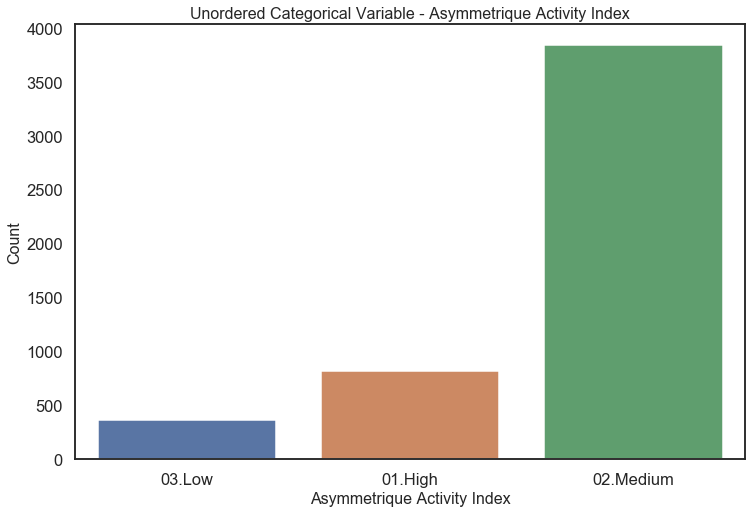

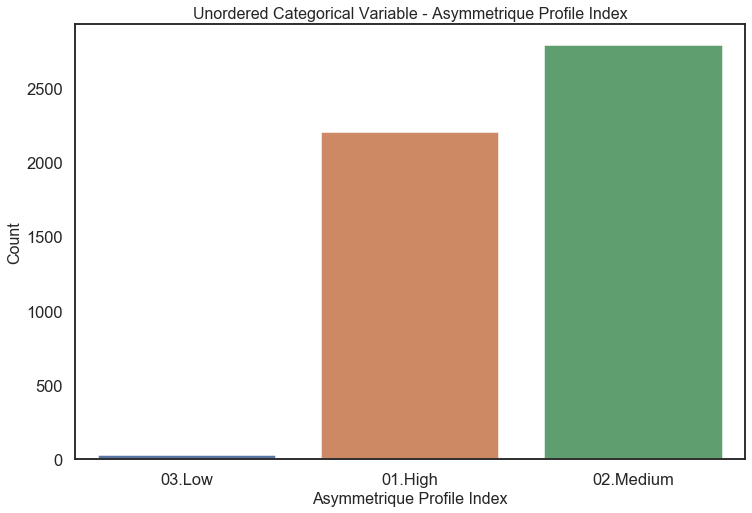

In [17]:
#List of Ordered Variables
OrderedCols = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

#Bar Plot creation
sns.set(style="white", context="talk")

# Draw a nested barplot to show segemented Var Income and Gender
for col in OrderedCols:
    plt.subplots(figsize=(12,8), sharex=True)
    sns.countplot(x=dfLead[col], data=dfLead, palette="deep", 
                  order=reversed(dfLead['Asymmetrique Activity Index'].value_counts().index))
    
    # Providing Label
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title("Unordered Categorical Variable - "+ col, fontsize=16)
    plt.show()

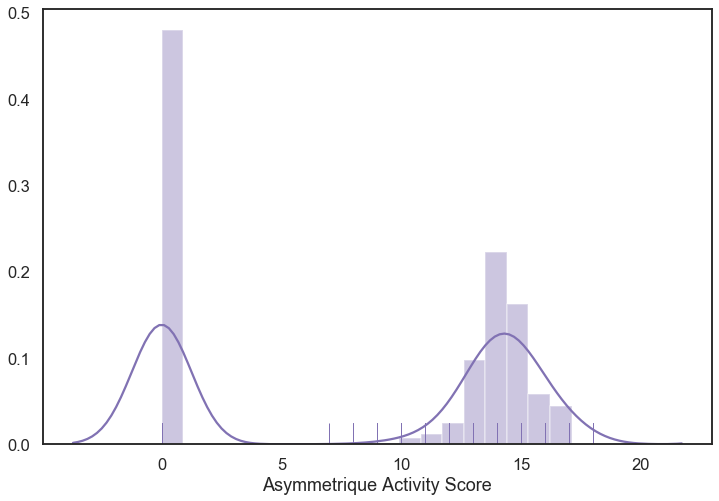

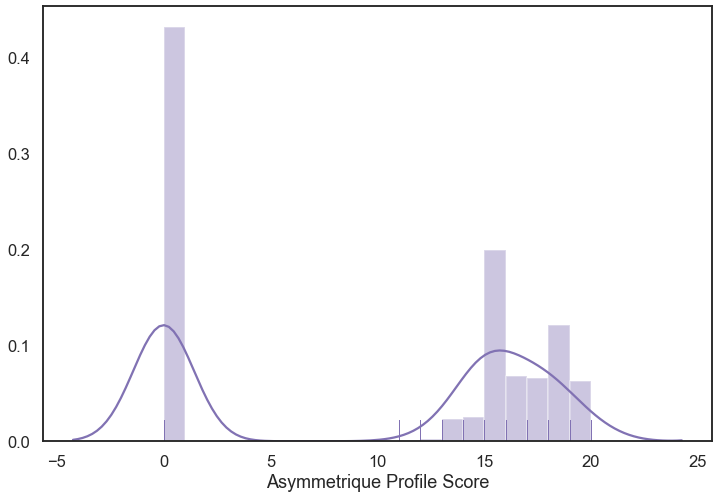

In [18]:
#List of Ordered Variables
OrderedCols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

#Histogram plot creation
for cols in OrderedCols:
    dfLead[cols] = dfLead[cols].fillna(0)
    plt.subplots(figsize=(12,8), sharex=True)
    sns.distplot(dfLead[cols], color='m', kde=True, rug=True, bins=20)
    plt.show()
    

> ## 3.3. Unordered Categorical Variables

> ### The below listed columns are Unordered Categorical Varaibles
> - Lead Origin
> - Lead Source
> - Last Activity
> - Country
> - Specialization
> - What is your current occupation
> - What matters most to you in choosing a course 
> - Tags
> - City
> - Last Notable Activity


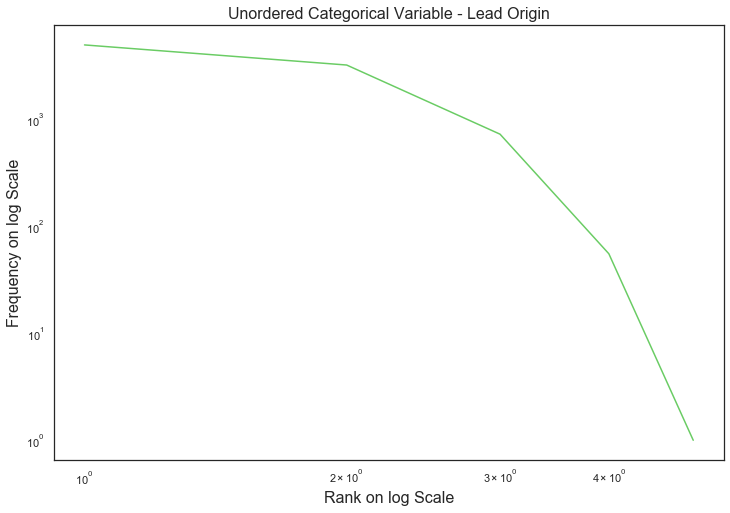

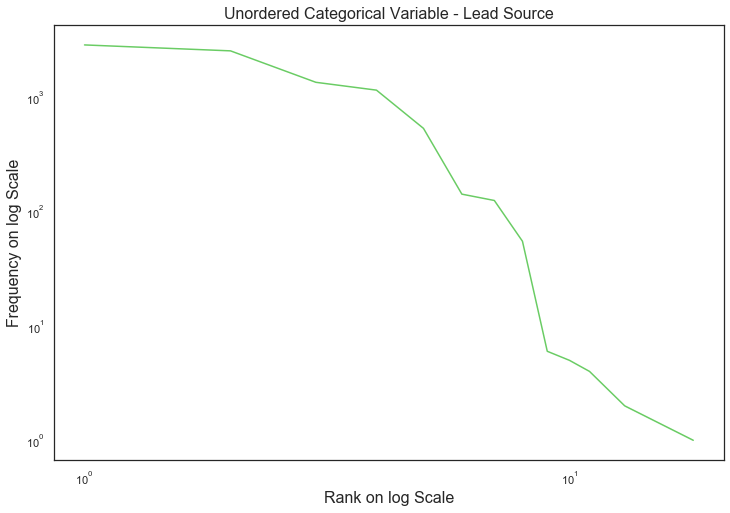

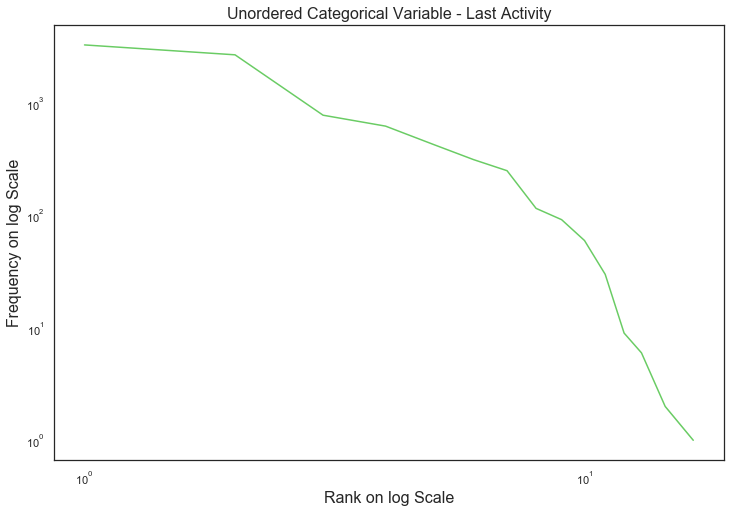

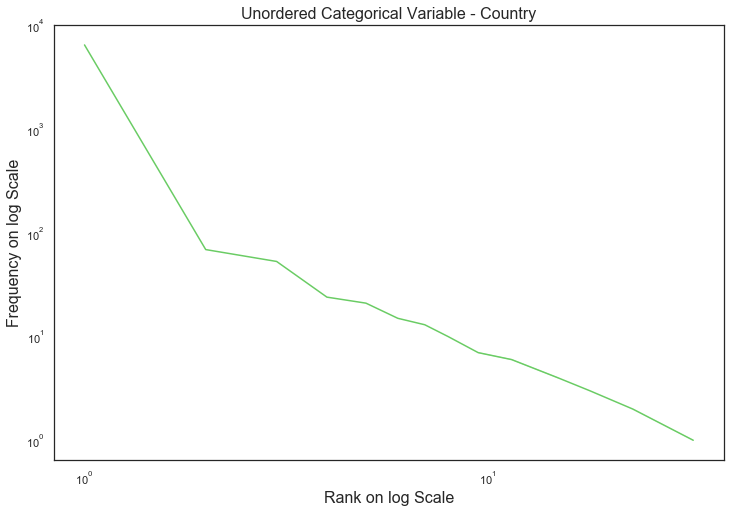

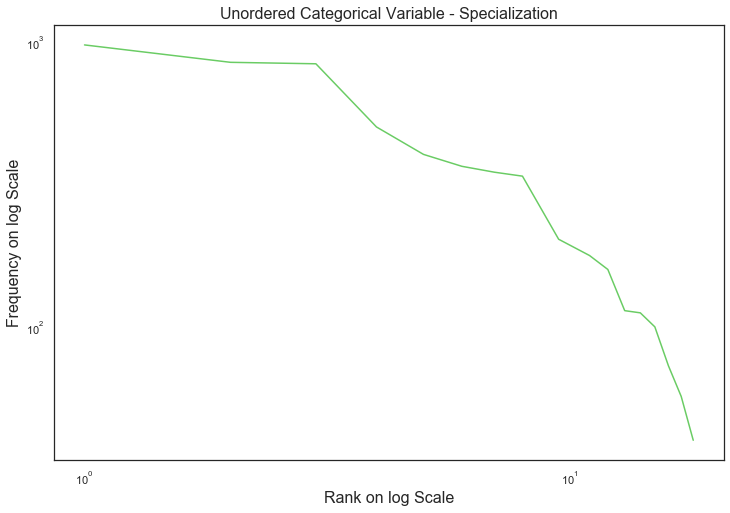

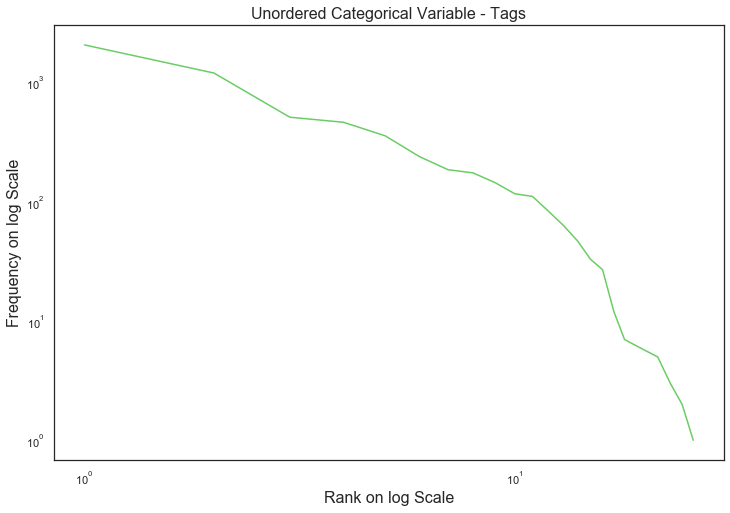

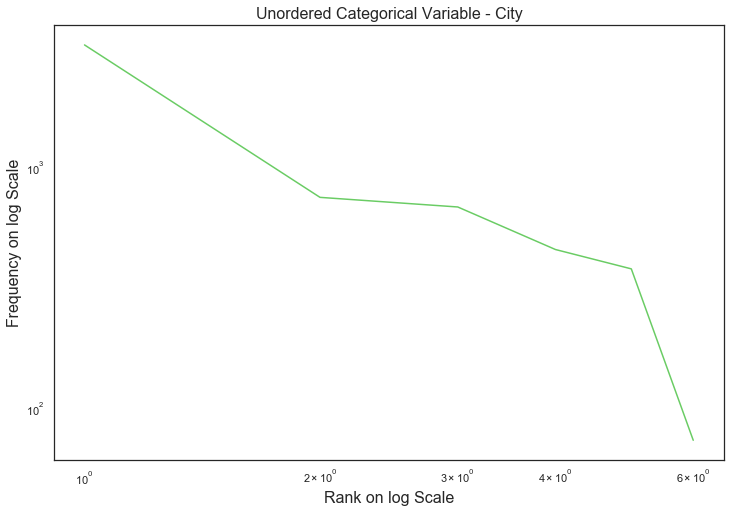

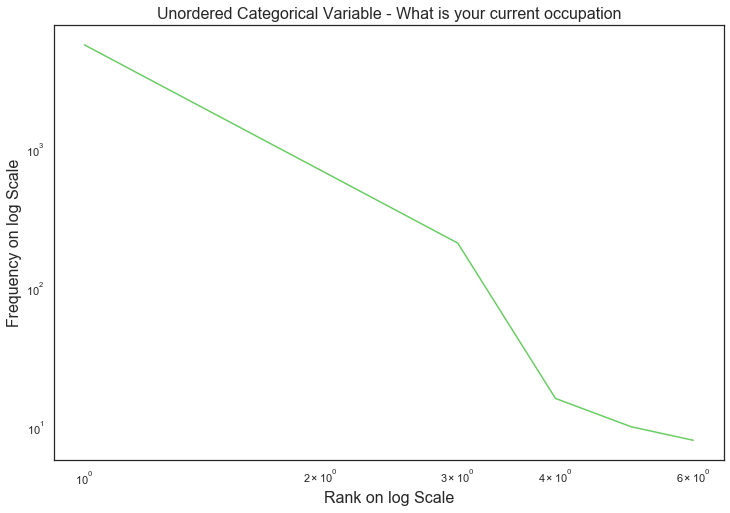

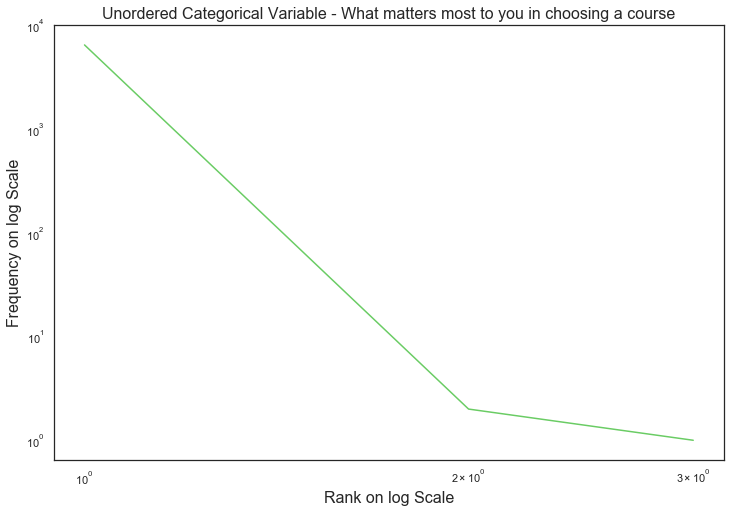

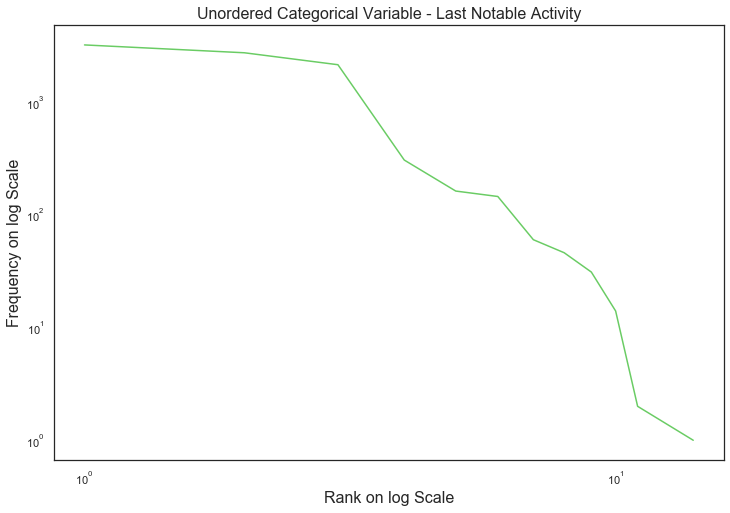

In [19]:
#List of Unordered Variables
UnorderedCols = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','Tags','City',
                 'What is your current occupation','What matters most to you in choosing a course',
                 'Last Notable Activity'] 

# Set Graph background white
sns.set(style="white", palette="muted", color_codes=True)

for cols in UnorderedCols:
    # plotting X and Y axis
    plt.subplots(figsize=(12,8), sharex=True)
    s = sns.lineplot(x=dfLead[cols].value_counts().rank(ascending=False).sort_values(ascending=True), 
                     y=dfLead[cols].value_counts().sort_values(ascending=False), markers=True, dashes=False, 
                     data=dfLead, color="g")
    
    #setting Scale as Log
    s.set_xscale('log')
    s.set_yscale('log')
    
    # Providing Label
    plt.xlabel('Rank on log Scale', fontsize=16)
    plt.ylabel('Frequency on log Scale', fontsize=16)
    plt.title("Unordered Categorical Variable - "+ cols, fontsize=16)
    plt.show()

> ## 3.4. Quantitative Variables

> ### The below listed columns are Unordered Categorical Varaibles
> - Lead Origin
> - Lead Source
> - Last Activity
> - Country
> - Specialization
> - What is your current occupation
> - What matters most to you in choosing a course 
> - Tags
> - City
> - Last Notable Activity
> - Asymmetrique Activity Index
> - Asymmetrique Profile Index
> - Asymmetrique Activity Score
> - Asymmetrique Profile Score

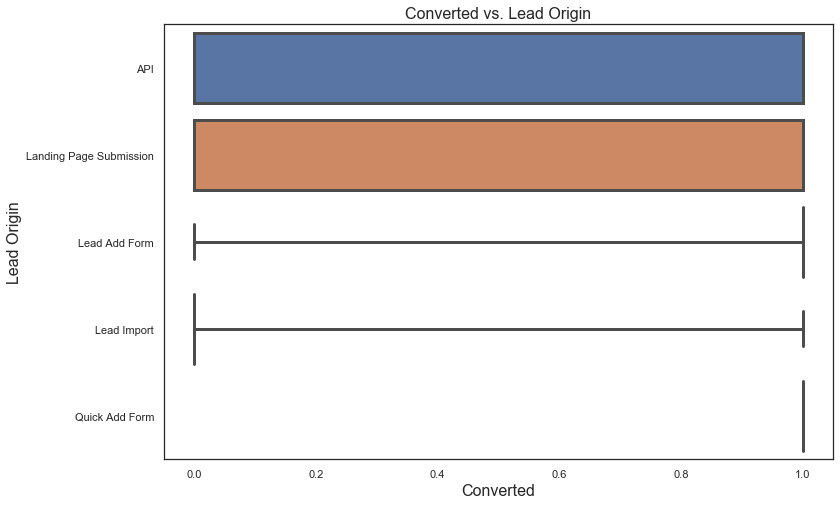

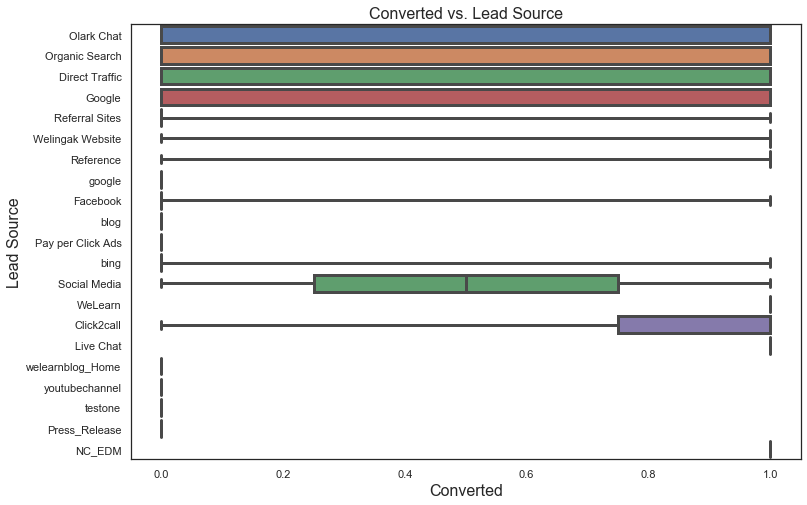

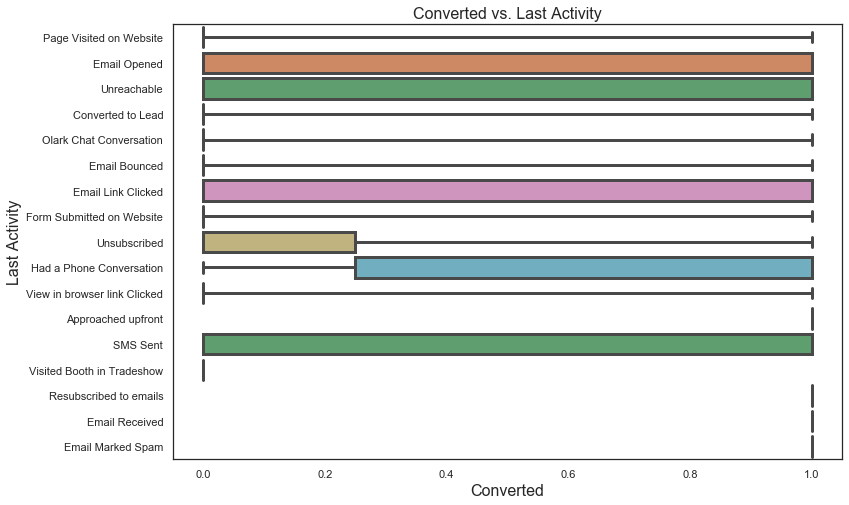

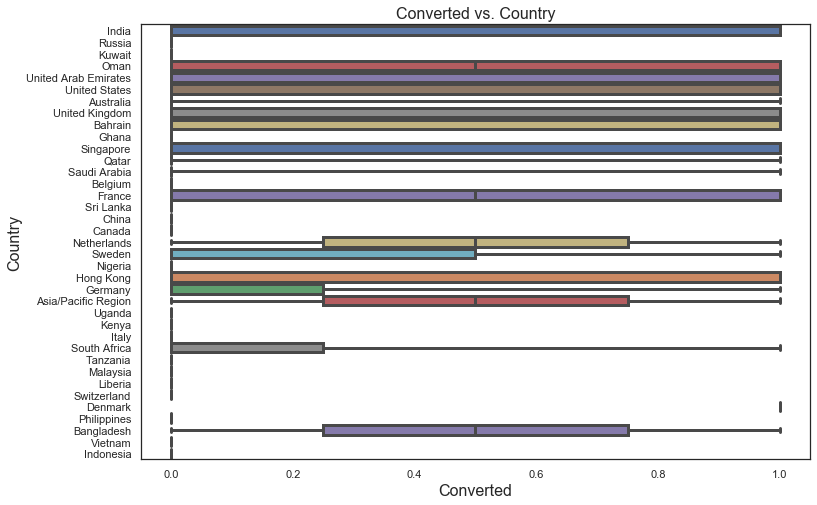

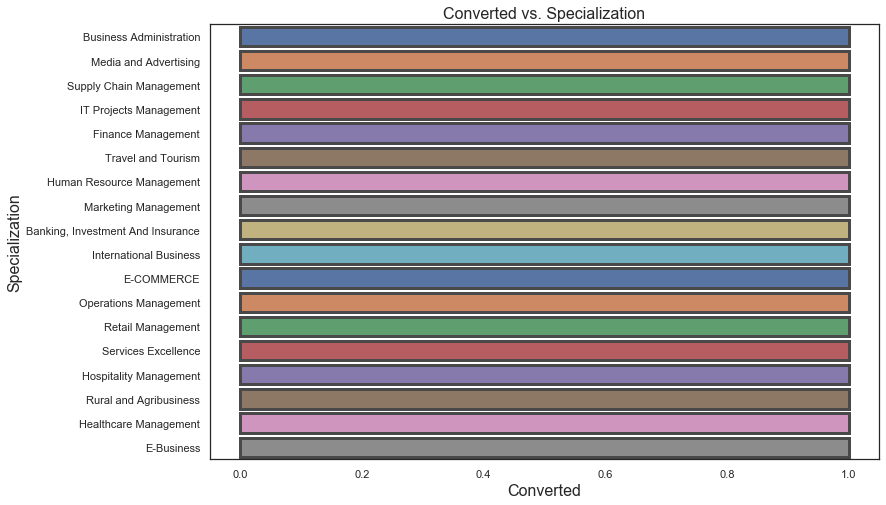

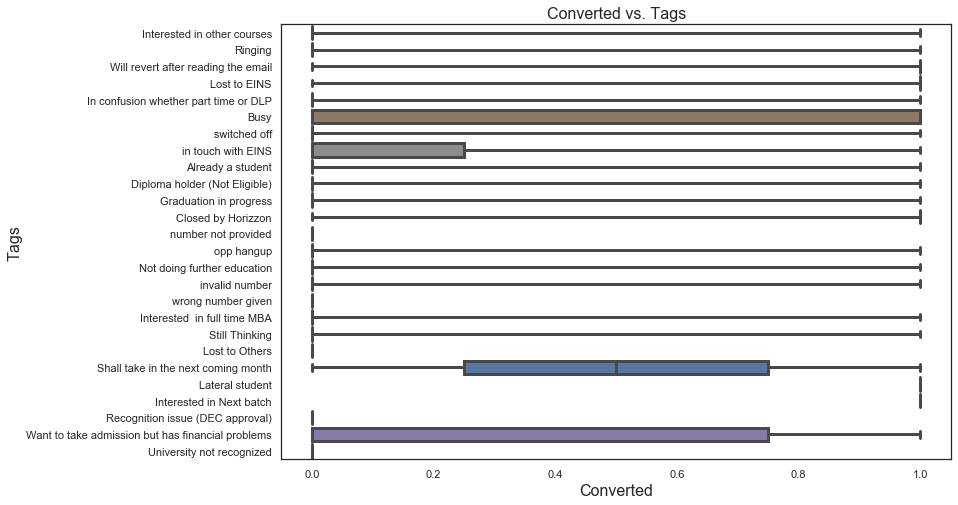

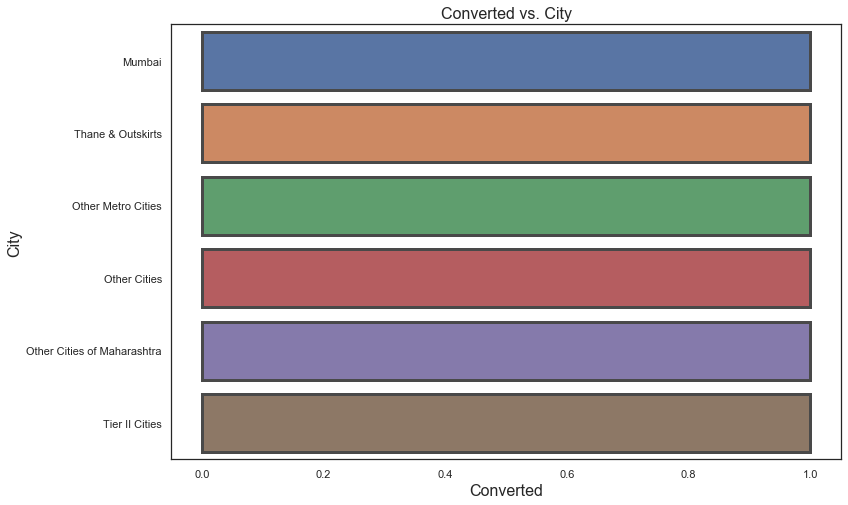

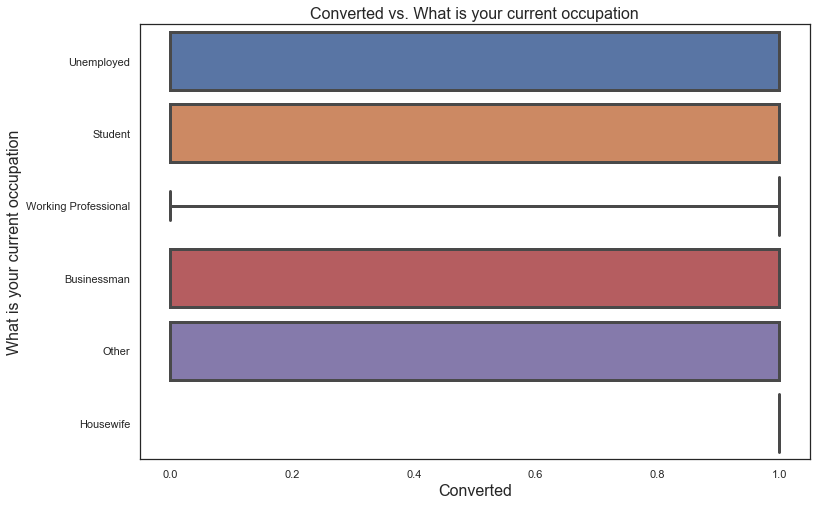

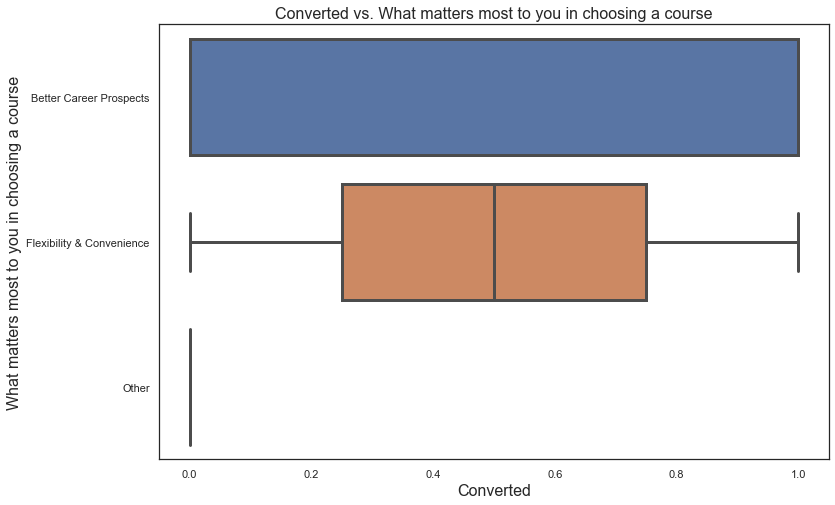

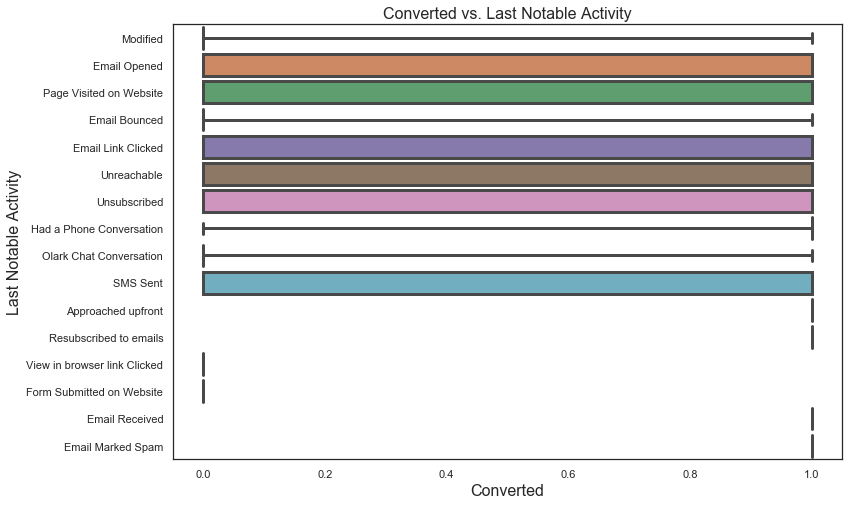

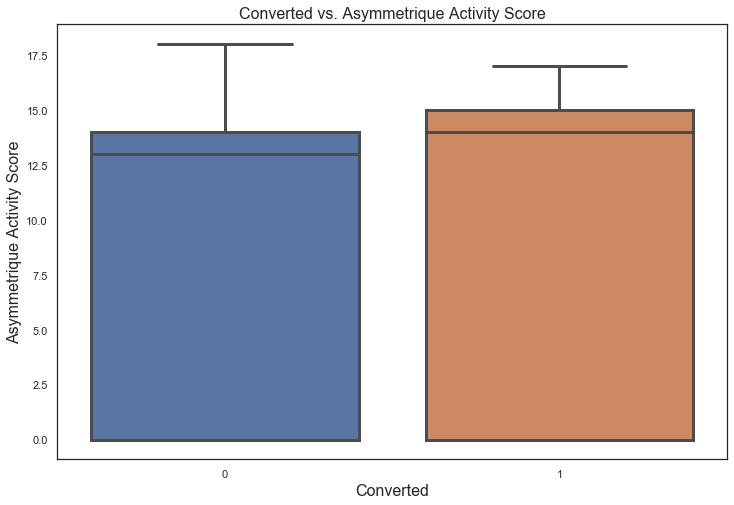

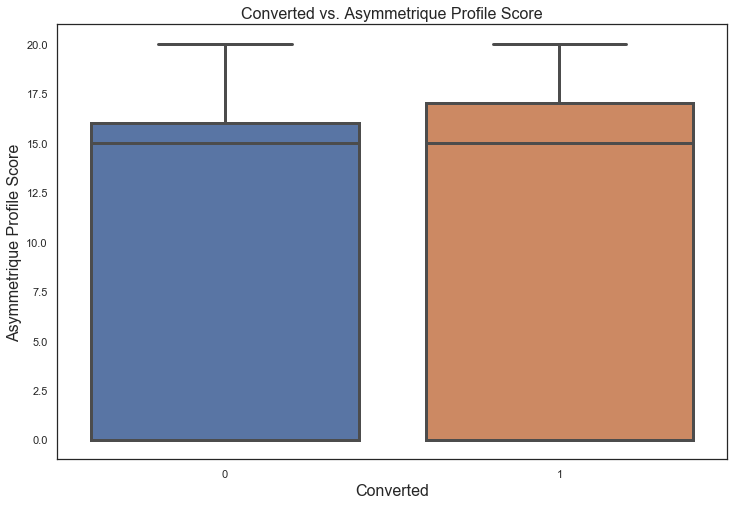

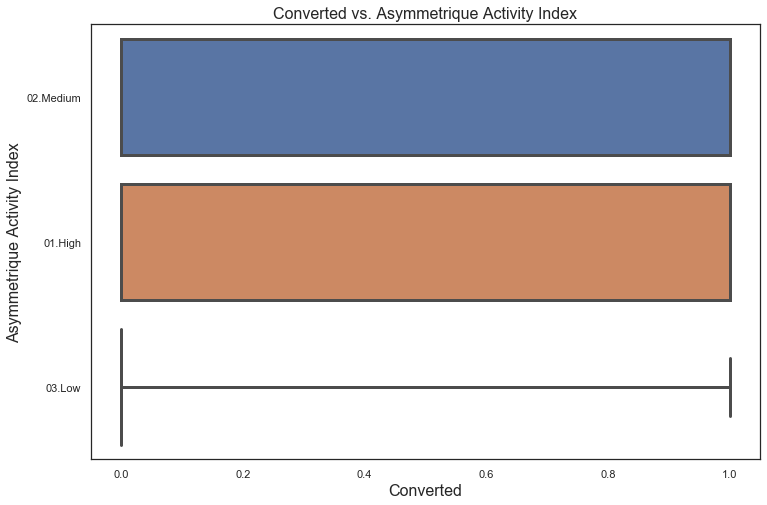

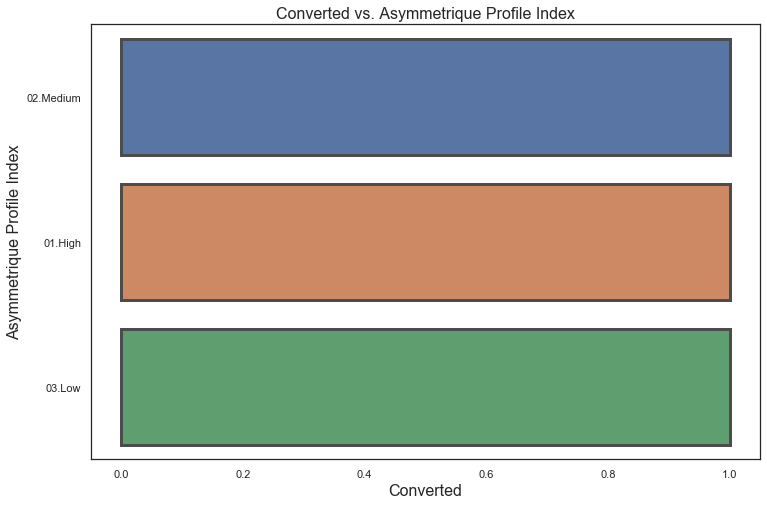

In [20]:
#Converted Vs. List of Quantitave Variables

QuantitativeCols = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','Tags','City',
                    'What is your current occupation','What matters most to you in choosing a course',
                    'Last Notable Activity','Asymmetrique Activity Score','Asymmetrique Profile Score',
                    'Asymmetrique Activity Index','Asymmetrique Profile Index'] 


#Box Plot
for col in QuantitativeCols:
    plt.subplots(figsize=(12,8), sharex=True)
    sns.boxplot(x=dfLead['Converted'], y=dfLead[col], whis="range", 
                color="y", linewidth=3, palette="deep")
    plt.xlabel('Converted', fontsize=16)
    plt.ylabel(col, fontsize=16)
    plt.title("Converted vs. " + col, fontsize=16)
    plt.show()


> # <font color=blue> 4. Segmented Analysis </font>

In [21]:
# assing count to series
dfLead0 = dfLead[dfLead['Converted']==0].count()
dfLead1 = dfLead[dfLead['Converted']==1].count()
dfLeadAll = dfLead.count()

#Caculating Percentage
Total = dfLeadAll / dfLeadAll.sum()
NotConverted =  dfLead0/dfLeadAll
Converted =  dfLead1/dfLeadAll
NotConvertedMin = dfLead[dfLead['Converted']==0].min()
NotConvertedMax = dfLead[dfLead['Converted']==0].max()
NotConvertedAvg = dfLead[dfLead['Converted']==0].mean()
ConvertedMin = dfLead[dfLead['Converted']==1].min()
ConvertedMax = dfLead[dfLead['Converted']==1].max()
ConvertedAvg = dfLead[dfLead['Converted']==1].mean()

#Creting dummy DataFrame
dfLeadSeg = pd.DataFrame()

#Adding all Series into DataFrame
dfLeadSeg = pd.concat([Total,NotConverted,Converted,NotConvertedMin,NotConvertedMax,NotConvertedAvg,
                       ConvertedMin,ConvertedMax,ConvertedAvg],axis=1, sort=False)
dfLeadSeg.columns=['Total','Not Converted','Converted','Not Converted Min','Not Converted Max',
                   'Not Converted Avg','Converted Min', 'Converted Max', 'Converted Avg']
dfLeadSeg['Total'] = dfLeadSeg['Total'].astype(float).map("{:.2%}".format)
dfLeadSeg['Not Converted'] = dfLeadSeg['Not Converted'].astype(float).map("{:.2%}".format)
dfLeadSeg['Converted'] = dfLeadSeg['Converted'].astype(float).map("{:.2%}".format)
dfLeadSeg


,Total,Not Converted,Converted,Not Converted Min,Not Converted Max,Not Converted Avg,Converted Min,Converted Max,Converted Avg
Prospect ID,3.80%,60.07%,39.93%,0006d10a-eb01-4ba9-92e2-ad78588b2a40,fffb0e5e-9f92-4017-9f42-781a69da4154,NaN,000104b9-23e4-4ddc-8caa-8629fe8ad7f4,ffec8e24-0c99-4345-89f1-e3ad6689764f,NaN
Lead Number,3.80%,60.07%,39.93%,579545,660737,616834.657681,579533,660727,617971.786221
Lead Origin,3.80%,60.07%,39.93%,API,Lead Import,NaN,API,Quick Add Form,NaN
Lead Source,3.79%,60.23%,39.77%,NaN,NaN,NaN,NaN,NaN,NaN
Do Not Email,3.80%,60.07%,39.93%,0,1,0.112347,0,1,0.032889
Do Not Call,3.80%,60.07%,39.93%,0,0,0.000000,0,1,0.000567
Converted,3.80%,60.07%,39.93%,0,0,0.000000,1,1,1.000000
TotalVisits,3.74%,60.59%,39.41%,0,141,3.557897,0,251,3.662387
Total Time Spent on Website,3.80%,60.07%,39.93%,0,2272,352.580773,0,2253,744.901049
Page Views Per Visit,3.74%,60.59%,39.41%,0,55,2.533428,0,15,2.369694


> # <font color=blue> 5. BiVariate Analysis </font>

> ## 5.1. Bivariate on Continous Variables

> ### The below listed columns are Unordered Categorical Varaibles
> - Lead Origin
> - Lead Source
> - Last Activity
> - Country
> - Specialization
> - What is your current occupation
> - What matters most to you in choosing a course 
> - Tags
> - City
> - Last Notable Activity
> - Asymmetrique Activity Index
> - Asymmetrique Profile Index
> - Asymmetrique Activity Score
> - Asymmetrique Profile Score

In [22]:
#Check correlation relation between continous variable
round(dfLead.corr(),2)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
Lead Number,1.00,-0.10,0.01,0.02,0.02,0.02,0.06,-0.01,-0.01,-0.00,0.00,-0.02,-0.01,0.16,0.15,-0.11
Do Not Email,-0.10,1.00,-0.00,-0.14,0.03,-0.05,0.03,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.04,-0.04,0.05
Do Not Call,0.01,-0.00,1.00,0.02,0.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.02,0.01,-0.01
Converted,0.02,-0.14,0.02,1.00,0.01,0.35,-0.04,-0.00,0.00,-0.01,-0.01,-0.01,0.02,-0.03,-0.02,-0.06
TotalVisits,0.02,0.03,0.00,0.01,1.00,0.20,0.50,0.05,0.03,0.04,0.01,0.02,0.03,-0.02,0.00,0.19
Total Time Spent on Website,0.02,-0.05,0.01,0.35,0.20,1.00,0.29,0.01,0.01,0.01,0.03,0.01,0.02,-0.04,-0.01,0.15
Page Views Per Visit,0.06,0.03,-0.01,-0.04,0.50,0.29,1.00,0.03,0.02,0.00,0.00,0.02,0.02,-0.05,-0.01,0.25
Search,-0.01,-0.01,-0.00,-0.00,0.05,0.01,0.03,1.00,0.19,0.27,-0.00,0.13,0.30,-0.01,-0.00,-0.00
Newspaper Article,-0.01,-0.00,-0.00,0.00,0.03,0.01,0.02,0.19,1.00,0.71,-0.00,0.35,0.27,-0.00,-0.00,0.01
X Education Forums,-0.00,-0.00,-0.00,-0.01,0.04,0.01,0.00,0.27,0.71,1.00,-0.00,0.50,0.38,-0.01,-0.01,0.02


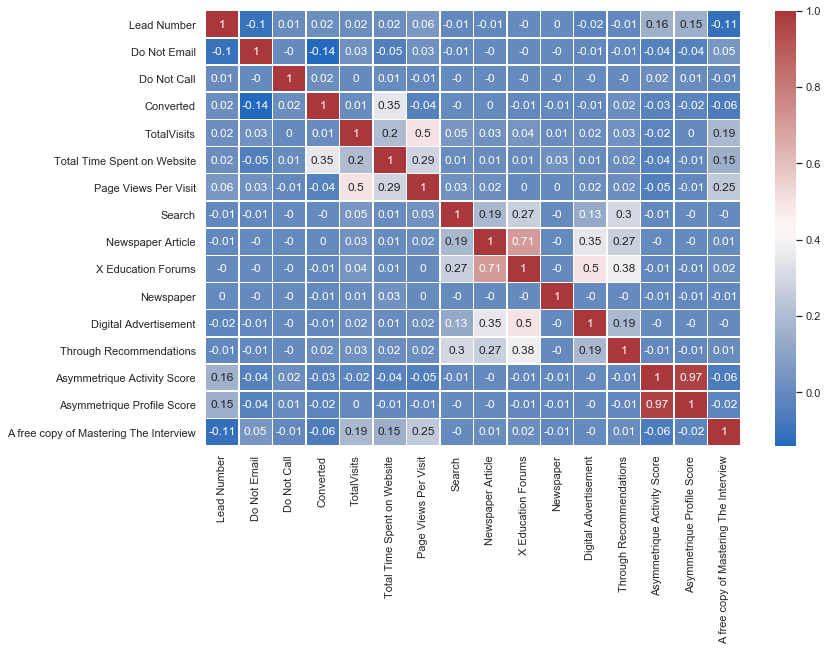

In [23]:
plt.subplots(figsize=(12,8))
sns.heatmap(round(dfLead.corr(),2), cmap='vlag', annot=True, linewidths=.5)

> ## 5.2. Bivariate on Categorical Variables

> ### The below listed columns are Categorical Varaibles
> - Lead Origin 
> - Lead Source
> - Last Activity
> - Country
> - Specialization
> - What is your current occupation
> - What matters most to you in choosing a course
> - Tags
> - City
> - Asymmetrique Activity Index
> - Asymmetrique Profile Index
> - Last Notable Activity

In [24]:
#BiVariate Categorical CrossTab Analsis Lead Origin vs. Converted
pd.crosstab(dfLead['Lead Origin'], dfLead['Converted'], margins=False, values=dfLead['Converted'], dropna=False, 
            aggfunc='count').reset_index().fillna(0)


Converted,Lead Origin,0,1
0,API,2091.0,1081.0
1,Landing Page Submission,3118.0,1768.0
2,Lead Add Form,54.0,664.0
3,Lead Import,42.0,13.0
4,Quick Add Form,0.0,1.0


In [25]:
#BiVariate Categorical CrossTab Analsis Lead Activity vs. Converted
pd.crosstab(dfLead['Last Activity'], dfLead['Converted'], margins=False, values=dfLead['Converted'], dropna=False, 
            aggfunc='count').reset_index().fillna(0)


Converted,Last Activity,0,1
0,Approached upfront,0.0,9.0
1,Converted to Lead,374.0,54.0
2,Email Bounced,289.0,26.0
3,Email Link Clicked,178.0,73.0
4,Email Marked Spam,0.0,2.0
5,Email Opened,2059.0,1248.0
6,Email Received,0.0,2.0
7,Form Submitted on Website,88.0,28.0
8,Had a Phone Conversation,8.0,22.0
9,Olark Chat Conversation,699.0,84.0


In [26]:
#BiVariate Categorical CrossTab Analsis Country vs. Converted
pd.crosstab(dfLead['Country'], dfLead['Converted'], margins=False, values=dfLead['Converted'], dropna=False, 
            aggfunc='count').reset_index().fillna(0)


Converted,Country,0,1
0,Asia/Pacific Region,1.0,1.0
1,Australia,10.0,3.0
2,Bahrain,3.0,4.0
3,Bangladesh,1.0,1.0
4,Belgium,2.0,0.0
5,Canada,4.0,0.0
6,China,2.0,0.0
7,Denmark,0.0,1.0
8,France,3.0,3.0
9,Germany,3.0,1.0


In [27]:
#BiVariate Categorical CrossTab Analsis Specialization vs. Converted
pd.crosstab(dfLead['Specialization'], dfLead['Converted'], margins=False, values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)


Converted,Specialization,0,1
0,"Banking, Investment And Insurance",171,167
1,Business Administration,224,179
2,E-Business,36,21
3,E-COMMERCE,72,40
4,Finance Management,540,436
5,Healthcare Management,80,79
6,Hospitality Management,66,48
7,Human Resource Management,460,388
8,IT Projects Management,226,140
9,International Business,114,64


In [28]:
#BiVariate Categorical CrossTab Analsis What is your current occupation vs. Converted
pd.crosstab(dfLead['What is your current occupation'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)


Converted,What is your current occupation,0,1
0,Businessman,3.0,5.0
1,Housewife,0.0,10.0
2,Other,6.0,10.0
3,Student,132.0,78.0
4,Unemployed,3159.0,2441.0
5,Working Professional,59.0,647.0


In [29]:
#BiVariate Categorical CrossTab Analsis What is your current occupation vs. Converted
pd.crosstab(dfLead['What matters most to you in choosing a course'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)


Converted,What matters most to you in choosing a course,0,1
0,Better Career Prospects,3338.0,3190.0
1,Flexibility & Convenience,1.0,1.0
2,Other,1.0,0.0


In [30]:
#BiVariate Categorical CrossTab Analsis Tags vs. Converted
pd.crosstab(dfLead['Tags'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)



Converted,Tags,0,1
0,Already a student,462.0,3.0
1,Busy,81.0,105.0
2,Closed by Horizzon,2.0,356.0
3,Diploma holder (Not Eligible),62.0,1.0
4,Graduation in progress,104.0,7.0
5,In confusion whether part time or DLP,4.0,1.0
6,Interested in full time MBA,114.0,3.0
7,Interested in Next batch,0.0,5.0
8,Interested in other courses,500.0,13.0
9,Lateral student,0.0,3.0


In [31]:
#BiVariate Categorical CrossTab Analsis Lead Origin vs. City
pd.crosstab(dfLead['City'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)



Converted,City,0,1
0,Mumbai,1913,1309
1,Other Cities,410,276
2,Other Cities of Maharashtra,256,201
3,Other Metro Cities,225,155
4,Thane & Outskirts,414,338
5,Tier II Cities,49,25


In [32]:
#BiVariate Categorical CrossTab Analsis Lead Origin vs. Asymmetrique Activity Index
pd.crosstab(dfLead['Asymmetrique Activity Index'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)



Converted,Asymmetrique Activity Index,0,1
0,01.High,576,245
1,02.Medium,2209,1630
2,03.Low,329,33


In [33]:
#BiVariate Categorical CrossTab Analsis Lead Origin vs. Asymmetrique Profile Index
pd.crosstab(dfLead['Asymmetrique Profile Index'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)



Converted,Asymmetrique Profile Index,0,1
0,01.High,1158,1045
1,02.Medium,1940,848
2,03.Low,16,15


In [34]:
#BiVariate Categorical CrossTab Analsis Lead Origin vs. Last Notable Activity
pd.crosstab(dfLead['Last Notable Activity'], dfLead['Converted'], margins=False, 
            values=dfLead['Converted'], 
            dropna=False, aggfunc='count').reset_index().fillna(0)



Converted,Last Notable Activity,0,1
0,Approached upfront,0.0,1.0
1,Email Bounced,51.0,9.0
2,Email Link Clicked,117.0,45.0
3,Email Marked Spam,0.0,2.0
4,Email Opened,1687.0,1039.0
5,Email Received,0.0,1.0
6,Form Submitted on Website,1.0,0.0
7,Had a Phone Conversation,1.0,13.0
8,Modified,2419.0,781.0
9,Olark Chat Conversation,120.0,25.0


> # <font color=blue> 6. Data Modeling </font>

> ## 6.1. Creating Dummy Variables

> ### The below listed columns are Unordered Categorical Varaibles
> - Lead Origin
> - Lead Source
> - Last Activity
> - Country
> - Specialization
> - What is your current occupation
> - What matters most to you in choosing a course 
> - Tags
> - City
> - Last Notable Activity
> - Asymmetrique Activity Index
> - Asymmetrique Profile Index

In [35]:
dfLeadModel = dfLead.copy()
dfLeadModel.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,14.0,20.0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,02.Medium,01.High,13.0,17.0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,18.0,0,Modified


In [36]:
#Creating a dummy variable 'Lead Origin' and dropping the first one.
LeadOrigin = pd.get_dummies(dfLeadModel['Lead Origin'], prefix="Lead Origin", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,LeadOrigin], axis=1)

#Creating a dummy variable 'Lead Source' and dropping the first one.
LeadSource = pd.get_dummies(dfLeadModel['Lead Source'], prefix="Lead Source", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,LeadSource], axis=1)

#Creating a dummy variable 'Last Activity' and dropping the first one.
LastActivity = pd.get_dummies(dfLeadModel['Last Activity'], prefix="Last Activity", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,LastActivity], axis=1)

#Creating a dummy variable 'Country' and dropping the first one.
Country = pd.get_dummies(dfLeadModel['Country'], prefix="Country", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,Country], axis=1)

#Creating a dummy variable 'Specialization' and dropping the first one.
Specialization = pd.get_dummies(dfLeadModel['Specialization'], prefix="Specialization", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,Specialization], axis=1)

#Creating a dummy variable 'What is your current occupation' and dropping the first one.
CurrOccup = pd.get_dummies(dfLeadModel['What is your current occupation'], prefix="CurrOccup", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,CurrOccup], axis=1)

#Creating a dummy variable 'What matters most to you in choosing a course' and dropping the first one.
MattersMost = pd.get_dummies(dfLeadModel['What matters most to you in choosing a course'], prefix="MattersMost", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,MattersMost], axis=1)

#Creating a dummy variable 'Tags' and dropping the first one.
Tags = pd.get_dummies(dfLeadModel['Tags'], prefix="Tags", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,Tags], axis=1)

#Creating a dummy variable 'City' and dropping the first one.
City = pd.get_dummies(dfLeadModel['City'], prefix="City", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,City], axis=1)

#Creating a dummy variable 'Asymmetrique Activity Index' and dropping the first one.
AsymmetriqueActivityIndex = pd.get_dummies(dfLeadModel['Asymmetrique Activity Index'], prefix="Asymmetrique Activity Index", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,AsymmetriqueActivityIndex], axis=1)

#Creating a dummy variable 'Asymmetrique Profile Index' and dropping the first one.
AsymmetriqueProfileIndex = pd.get_dummies(dfLeadModel['Asymmetrique Profile Index'], prefix="Asymmetrique Profile Index", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,AsymmetriqueProfileIndex], axis=1)

#Creating a dummy variable 'Last Notable Activity' and dropping the first one.
LastNotableActivity = pd.get_dummies(dfLeadModel['Last Notable Activity'], prefix="Last Notable Activity", drop_first=True)
#Adding the results to the master dataframe
dfLeadModel = pd.concat([dfLeadModel,LastNotableActivity], axis=1)


In [37]:
# We have created dummies for the below variables, so we can drop them
dfLeadModel = dfLeadModel.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization',
                                'What is your current occupation','What matters most to you in choosing a course',
                                'Tags','City','Last Notable Activity','Asymmetrique Activity Index',
                                'Asymmetrique Profile Index'],1)


In [38]:
dfLeadModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Columns: 166 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(12), object(1), uint8(149)
memory usage: 2.4+ MB


> ## 6.2. Outliner Treatement

In [39]:
num_dfLeadModel = dfLeadModel[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
                   'Asymmetrique Activity Score','Asymmetrique Profile Score']]

#Checking for outlier in the contionout variables
num_dfLeadModel.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,8695.000000,8832.000000,8695.000000,8832.000000,8832.000000
mean,3.599080,509.251245,2.468895,8.134737,9.293931
std,4.903091,550.146578,2.137963,7.162587,8.209996
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,39.000000,1.000000,0.000000,0.000000
50%,3.000000,271.000000,2.000000,13.000000,15.000000
75%,5.000000,967.000000,3.500000,14.000000,16.000000
90%,7.000000,1392.000000,5.000000,15.000000,18.000000
95%,10.000000,1570.000000,6.000000,16.000000,19.000000
99%,17.000000,1845.000000,9.000000,17.000000,20.000000


> ### 6.2.1. Outliner Treatement - TotalVisits

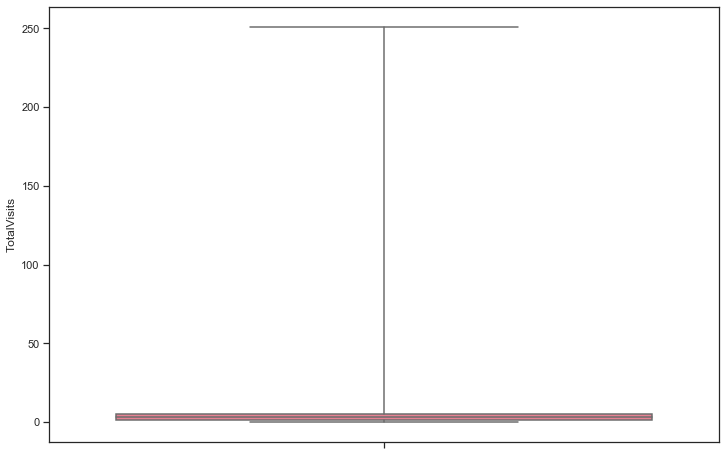

0.05 Percentile is : 0.0, 0.90 Percentile is : 17.0, 0.95 Percentile is : 17.0
TotalVisits - Total Number of Records 8695, after removing outliner 8613, Percentage dropped 0.94%


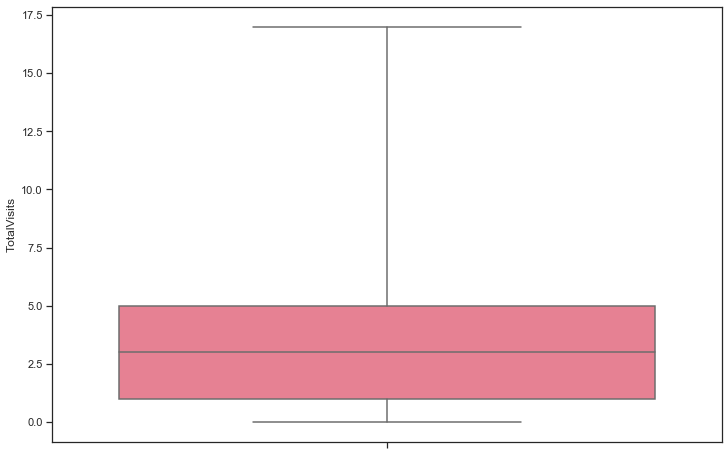

In [40]:
#BarPlot before dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=dfLeadModel['TotalVisits'], whis="range", palette="husl")
plt.show()

#Total record count of column
TotalCount = dfLeadModel['TotalVisits'].count()

#outliner teatment for child_mort
Q1=dfLeadModel['TotalVisits'].quantile(0.05)
Q3=dfLeadModel['TotalVisits'].quantile(0.99)

IQR = Q3-Q1
print("0.05 Percentile is : {0}, 0.90 Percentile is : {1}, 0.95 Percentile is : {2}".format(Q1,IQR,Q3))

#removing outlier records
dfLeadModel = dfLeadModel[(dfLeadModel['TotalVisits']>=Q1) & (dfLeadModel['TotalVisits']<=Q3)]

#Total record count after removing outlier
RemoveCount = dfLeadModel['TotalVisits'].count()

#Dropped records percentage calculation
perCalc=0
perCalc = round(100*(1 - RemoveCount/TotalCount),2)
print("TotalVisits - Total Number of Records {0}, after removing outliner {1}, Percentage dropped {2}%".format(TotalCount, RemoveCount, perCalc))

#BarPlot after dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=dfLeadModel['TotalVisits'], whis="range", palette="husl")
plt.show()


> ### 6.2.2. Outliner Treatement - Total Time Spent on Website

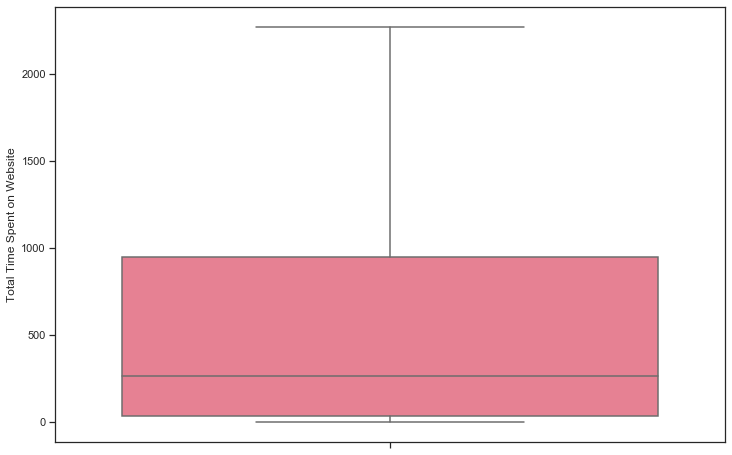

0.05 Percentile is : 0.0, 0.90 Percentile is : 1840.8799999999992, 0.95 Percentile is : 1840.8799999999992
Total Time Spent on Website - Total Number of Records 8613, after removing outliner 8526, Percentage dropped 1.01%


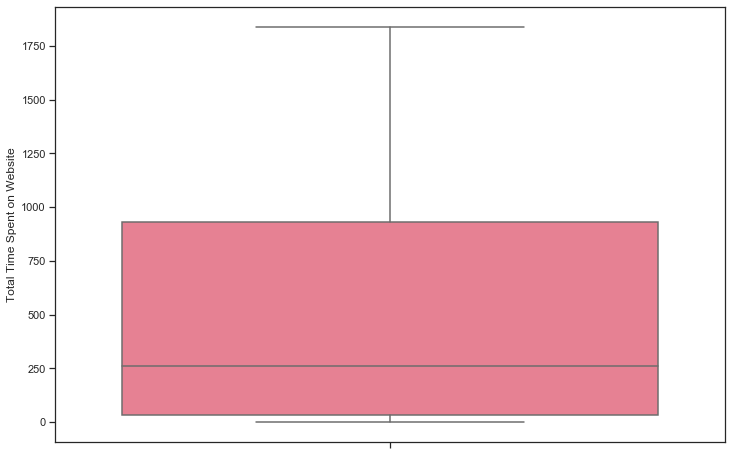

In [41]:
#BarPlot before dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=dfLeadModel['Total Time Spent on Website'], whis="range", palette="husl")
plt.show()

#Total record count of column
TotalCount = dfLeadModel['Total Time Spent on Website'].count()

#outliner teatment for child_mort
Q1=dfLeadModel['Total Time Spent on Website'].quantile(0.05)
Q3=dfLeadModel['Total Time Spent on Website'].quantile(0.99)

IQR = Q3-Q1
print("0.05 Percentile is : {0}, 0.90 Percentile is : {1}, 0.95 Percentile is : {2}".format(Q1,IQR,Q3))

#removing outlier records
dfLeadModel = dfLeadModel[(dfLeadModel['Total Time Spent on Website']>=Q1) & (dfLeadModel['Total Time Spent on Website']<=Q3)]

#Total record count after removing outlier
RemoveCount = dfLeadModel['Total Time Spent on Website'].count()

#Dropped records percentage calculation
perCalc=0
perCalc = round(100*(1 - RemoveCount/TotalCount),2)
print("Total Time Spent on Website - Total Number of Records {0}, after removing outliner {1}, Percentage dropped {2}%".format(TotalCount, RemoveCount, perCalc))

#BarPlot after dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=dfLeadModel['Total Time Spent on Website'], whis="range", palette="husl")
plt.show()


> ### 6.2.3. Outliner Treatement - Page Views Per Visit

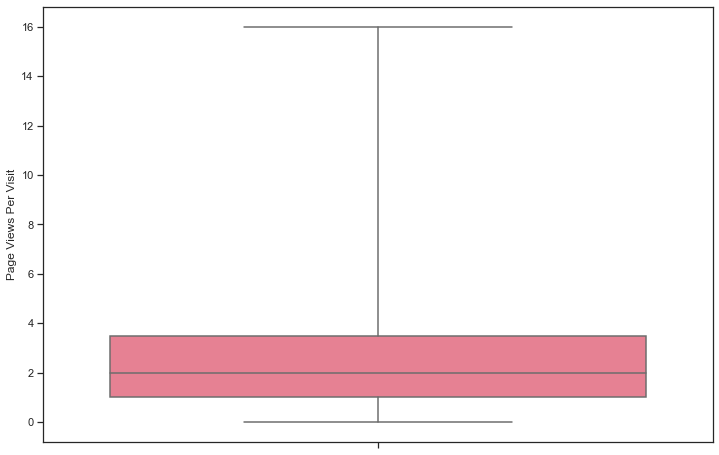

0.05 Percentile is : 0.0, 0.90 Percentile is : 9.0, 0.95 Percentile is : 9.0
Page Views Per Visit - Total Number of Records 8526, after removing outliner 8459, Percentage dropped 0.79%


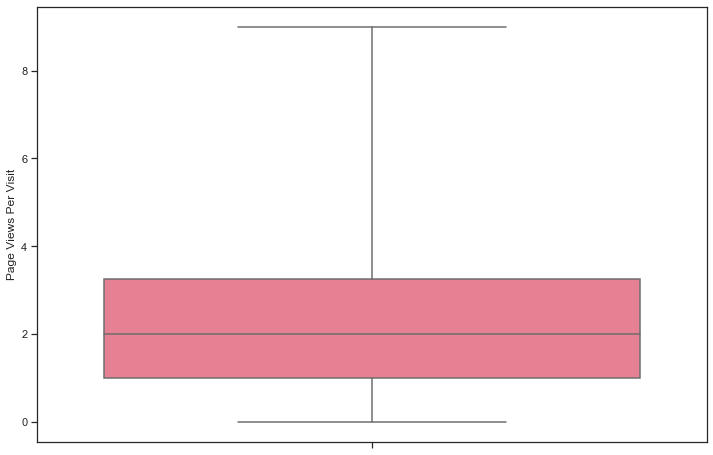

In [42]:
#BarPlot before dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=dfLeadModel['Page Views Per Visit'], whis="range", palette="husl")
plt.show()

#Total record count of column
TotalCount = dfLeadModel['Page Views Per Visit'].count()

#outliner teatment for child_mort
Q1=dfLeadModel['Page Views Per Visit'].quantile(0.05)
Q3=dfLeadModel['Page Views Per Visit'].quantile(0.99)

IQR = Q3-Q1
print("0.05 Percentile is : {0}, 0.90 Percentile is : {1}, 0.95 Percentile is : {2}".format(Q1,IQR,Q3))

#removing outlier records
dfLeadModel = dfLeadModel[(dfLeadModel['Page Views Per Visit']>=Q1) & (dfLeadModel['Page Views Per Visit']<=Q3)]

#Total record count after removing outlier
RemoveCount = dfLeadModel['Page Views Per Visit'].count()

#Dropped records percentage calculation
perCalc=0
perCalc = round(100*(1 - RemoveCount/TotalCount),2)
print("Page Views Per Visit - Total Number of Records {0}, after removing outliner {1}, Percentage dropped {2}%".format(TotalCount, RemoveCount, perCalc))

#BarPlot after dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=dfLeadModel['Page Views Per Visit'], whis="range", palette="husl")
plt.show()


> ### 6.3. Checking for Missing Values and inputting them

In [43]:
#Checking the percentage of missing values
round(100*(dfLeadModel.isnull().sum()/len(dfLeadModel.index)),2).sort_values(ascending=False)

Last Notable Activity_View in browser link Clicked    0.0
Country_Canada                                        0.0
Country_Bangladesh                                    0.0
Country_Bahrain                                       0.0
Country_Australia                                     0.0
Last Activity_Visited Booth in Tradeshow              0.0
Last Activity_View in browser link Clicked            0.0
Last Activity_Unsubscribed                            0.0
Last Activity_Unreachable                             0.0
Last Activity_SMS Sent                                0.0
Last Activity_Resubscribed to emails                  0.0
Last Activity_Page Visited on Website                 0.0
Last Activity_Olark Chat Conversation                 0.0
Last Activity_Had a Phone Conversation                0.0
Last Activity_Form Submitted on Website               0.0
Last Activity_Email Received                          0.0
Last Activity_Email Opened                            0.0
Last Activity_

> ### 6.4. Feature Standardisation

In [44]:
# Normalising continuous features
norm_df = dfLeadModel[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
                       'Asymmetrique Activity Score','Asymmetrique Profile Score']]

normalized_df = (norm_df - norm_df.mean())/norm_df.std()

dfLeadModel = dfLeadModel.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
                                 'Asymmetrique Activity Score','Asymmetrique Profile Score',
                                'X Education Forums','Lead Origin_Quick Add Form'], axis=1)

dfLeadModel = pd.concat([dfLeadModel,normalized_df], axis=1)
dfLeadModel.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,CurrOccup_Housewife,CurrOccup_Other,CurrOccup_Student,CurrOccup_Unemployed,CurrOccup_Working Professional,MattersMost_Flexibility & Convenience,MattersMost_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visit

> ### 6.5. Checking the Convertable Percentage

> #### we have almost 39% of the Convertable Percentage

In [45]:
convert = (sum(dfLeadModel['Converted'])/len(dfLeadModel['Converted'].index))*100
convert

39.07081215273673

> # <font color=blue> 7. Model Building </font>

> ## 7.1. Splitting Data into Training and Test Sets

In [46]:
#Putting feature variable to X
X = dfLeadModel.drop(['Prospect ID','Lead Number','Converted'],axis=1)

#Putting featured variable to y
y = dfLeadModel['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

> ## 7.2. Running the Training Model

In [48]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5767
Model Family:                Binomial   Df Model:                          153
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        03:46:04   Pearson chi2:                 1.87e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2.418e+16      8e+07   3.02e+08      0.000    2.42e+16    2.42e+16
Do Not Email                                           -2.289e+14    4.7e+06  -4.87e+07      0.000   -2.29e+14   -2.29e+14
Do Not Call                                              1.37e+15   4.78e+07   2.87e+07      0.000    1.37e+15    1.37e+15
Search                                                  3.454e+13    2.4e+07   1.44e+06      0.000    3.45e+13    3.45e+13
Newspaper Article                                       1.841e+16   6.75e+07   2.73e+08      0.000    1.84e+16    1.84e+16
Newspaper                                               1246.1113   3.95e-06   3.16e+08      0.000    1246.111    1246.111
Digital Advertisement                                   3.093e+14   3.93e+07   7.88e+06      0.000    3.09e+14    3.09e+14
Through Recommendations                                 1.881e+16   6.73e+07   2.79e+08      0.000    1.88e+16    1.88e+16
A free copy of Mastering The Interview                 -5.808e+13   2.81e+06  -2.07e+07      0.000   -5.81e+13   -5.81e+13
Lead Origin_Landing Page Submission                    -4.617e+13    3.6e+06  -1.28e+07      0.000   -4.62e+13   -4.62e+13
Lead Origin_Lead Add Form                              -8.136e+14   3.72e+07  -2.19e+07      0.000   -8.14e+14   -8.14e+14
Lead Origin_Lead Import                                 1.894e+15   5.41e+07    3.5e+07      0.000    1.89e+15    1.89e+15
Lead Source_Direct Traffic                             -1.211e+15   3.74e+07  -3.24e+07      0.000   -1.21e+15   -1.21e+15
Lead Source_Facebook                                   -3.459e+15   5.35e+07  -6.47e+07      0.000   -3.46e+15   -3.46e+15
Lead Source_Google                                     -1.085e+15   3.73e+07  -2.91e+07      0.000   -1.09e+15   -1.09e+15
Lead Source_Live Chat                                    9.19e+15   4.99e+07   1.84e+08      0.000    9.19e+15    9.19e+15
Lead Source_NC_EDM                                      3.735e+15    7.7e+07   4.85e+07      0.000    3.74e+15    3.74e+15
Lead Source_Olark Chat                                  -1.33e+15   3.77e+07  -3.53e+07      0.000   -1.33e+15   -1.33e+15
Lead Source_Organic Search                             -1.136e+15   3.74e+07  -3.04e+07      0.000   -1.14e+15   -1.14e+15
Lead Source_Pay per Click Ads                          -1.673e+16    7.7e+07  -2.17e+08      0.000   -1.67e+16   -1.67e+16
Lead Source_Press_Release                               -1.63e+16   7.74e+07  -2.11e+08      0.000   -1.63e+16   -1.63e+16
Lead Source_Reference                                  -5.433e+14   1.55e+07  -3.51e+07      0.000   -5.43e+14   -5.43e+14
Lead Sou

> ## 7.3. Feature Selection Using RFE

In [49]:
logreg = LogisticRegression()

#Running RFE with 37 Varaiable as output
rfe = RFE(logreg,37)
rfe = rfe.fit(X,y)

#Print Boolean results
print(rfe.support_)

#Print ranking
print(rfe.ranking_)


[ True False False False False False False False False  True False False
 False False False  True False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False  True False
  True False  True False False False False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False  True  True False False False
  True  True False False  True False  True  True  True False  True False
  True False  True False  True  True False  True  True  True  True  True
 False False False False False  True False False False False  True False
 False False False False  True  True False False  True False False False
 False  True False  True  True]
[  1  96  26 107  8

In [50]:
#Varaibles selected by RFE

col =['Do Not Email','Lead Origin_Lead Add Form','Lead Source_NC_EDM','Lead Source_Welingak Website',
      'Last Activity_SMS Sent','Country_India','Country_Italy','Country_Kuwait','Country_Qatar',
      'Country_Saudi Arabia','CurrOccup_Housewife','CurrOccup_Unemployed','CurrOccup_Working Professional',
      'Tags_Closed by Horizzon','Tags_Diploma holder (Not Eligible)',
      'Tags_Interested in other courses','Tags_Lost to EINS','Tags_Not doing further education','Tags_Ringing',
      'Tags_Still Thinking','Tags_Want to take admission but has financial problems',
      'Tags_Will revert after reading the email','Tags_invalid number','Tags_number not provided',
      'Tags_opp hangup','Tags_switched off','Tags_wrong number given','Asymmetrique Activity Index_02.Medium',
      'Last Notable Activity_Email Link Clicked','Last Notable Activity_Modified',
      'Last Notable Activity_Olark Chat Conversation','Last Notable Activity_SMS Sent',
      'Total Time Spent on Website','Asymmetrique Activity Score','Asymmetrique Profile Score']


In [51]:
#Run the model using the selected variables
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train,y_train)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Comparing the model with StatsModel
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5921
Model:                            GLM   Df Residuals:                     5767
Model Family:                Binomial   Df Model:                          153
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        03:46:12   Pearson chi2:                 1.87e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2.418e+16      8e+07   3.02e+08      0.000    2.42e+16    2.42e+16
Do Not Email                                           -2.289e+14    4.7e+06  -4.87e+07      0.000   -2.29e+14   -2.29e+14
Do Not Call                                              1.37e+15   4.78e+07   2.87e+07      0.000    1.37e+15    1.37e+15
Search                                                  3.454e+13    2.4e+07   1.44e+06      0.000    3.45e+13    3.45e+13
Newspaper Article                                       1.841e+16   6.75e+07   2.73e+08      0.000    1.84e+16    1.84e+16
Newspaper                                               1246.1113   3.95e-06   3.16e+08      0.000    1246.111    1246.111
Digital Advertisement                                   3.093e+14   3.93e+07   7.88e+06      0.000    3.09e+14    3.09e+14
Through Recommendations                                 1.881e+16   6.73e+07   2.79e+08      0.000    1.88e+16    1.88e+16
A free copy of Mastering The Interview                 -5.808e+13   2.81e+06  -2.07e+07      0.000   -5.81e+13   -5.81e+13
Lead Origin_Landing Page Submission                    -4.617e+13    3.6e+06  -1.28e+07      0.000   -4.62e+13   -4.62e+13
Lead Origin_Lead Add Form                              -8.136e+14   3.72e+07  -2.19e+07      0.000   -8.14e+14   -8.14e+14
Lead Origin_Lead Import                                 1.894e+15   5.41e+07    3.5e+07      0.000    1.89e+15    1.89e+15
Lead Source_Direct Traffic                             -1.211e+15   3.74e+07  -3.24e+07      0.000   -1.21e+15   -1.21e+15
Lead Source_Facebook                                   -3.459e+15   5.35e+07  -6.47e+07      0.000   -3.46e+15   -3.46e+15
Lead Source_Google                                     -1.085e+15   3.73e+07  -2.91e+07      0.000   -1.09e+15   -1.09e+15
Lead Source_Live Chat                                    9.19e+15   4.99e+07   1.84e+08      0.000    9.19e+15    9.19e+15
Lead Source_NC_EDM                                      3.735e+15    7.7e+07   4.85e+07      0.000    3.74e+15    3.74e+15
Lead Source_Olark Chat                                  -1.33e+15   3.77e+07  -3.53e+07      0.000   -1.33e+15   -1.33e+15
Lead Source_Organic Search                             -1.136e+15   3.74e+07  -3.04e+07      0.000   -1.14e+15   -1.14e+15
Lead Source_Pay per Click Ads                          -1.673e+16    7.7e+07  -2.17e+08      0.000   -1.67e+16   -1.67e+16
Lead Source_Press_Release                               -1.63e+16   7.74e+07  -2.11e+08      0.000   -1.63e+16   -1.63e+16
Lead Source_Reference                                  -5.433e+14   1.55e+07  -3.51e+07      0.000   -5.43e+14   -5.43e+14
Lead Sou

In [53]:
X_test[col].shape

(2538, 35)

> ## 7.4. Making Predictions

In [54]:
#Predict probabilities
y_pred = logsk.predict_proba(X_test)

#Converting y_pred to a datafram which is an arrau
y_pred_df = pd.DataFrame(y_pred)

#Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

,1
0,0.998478
1,0.015028
2,0.018747
3,0.597721
4,0.007424


In [55]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
7662,1
4834,0
3925,0
5231,0
4442,0


In [94]:
#adding Prospect ID to index
y_test_df['Lead Number'] = y_test_df.index

#Removing index for both dataframe to appedn them side by side
#y_pred_1.reset_index(drop=True, inplace=True)
#y_test_df.reset_index(drop=True, inplace=True)

#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)

#Renaming the column
y_pred_final = y_pred_final.rename(columns={1: 'Converted_prob'})

#Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_prob'], axis=1)

y_pred_final.head()

,Lead Number,Converted,Converted_prob
0,0,1,0.998478
1,1,0,0.015028
2,2,0,0.018747
3,3,0,0.597721
4,4,0,0.007424


In [95]:
#Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,Lead Number,Converted,Converted_prob,Predicted
0,0,1,0.998478,1
1,1,0,0.015028,0
2,2,0,0.018747,0
3,3,0,0.597721,1
4,4,0,0.007424,0


In [96]:
y_pred_final['Lead Score'] = round(y_pred_final['Converted_prob']*100,0)
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Predicted,Lead Score
0,0,1,0.998478,1,100.0
1,1,0,0.015028,0,2.0
2,2,0,0.018747,0,2.0
3,3,0,0.597721,1,60.0
4,4,0,0.007424,0,1.0


> ## 7.5. Confusion Matrix

In [59]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Predicted'])
confusion

array([[1463,   73],
       [ 117,  885]])

<Table>
    <tr>
        <td><b> Predicted <br> Actual </b></td>
        <td><b> Converted </b> </td>
        <td><b> Not Converted </b></td>
        <td><b> _ALL_ </b></td>
    </tr>
    <tr>
        <td><b> Converted  </b></td>
        <td> 1463  </td>
        <td> 73 </td>
        <td> 1536 </td>
    </tr>
    <tr>
        <td><b> Not Converted </b></td>
        <td> 117  </td>
        <td> 885 </td>
        <td> 1002 </td>
    </tr>
    <tr>
        <td><b> _ALL_ </b></td>
        <td> 1580  </td>
        <td> 958 </td>
        <td> 2538 </td>
    </tr>
</Table>

> ## 7.6. Check for overall accuracy

> - #### classification rate of 92.5%, consider as good Accuracy
> - #### Precision is 93.4%
> - #### Recall 88.3%

In [60]:
#Check for overall accuracy
print("Accuracy: ",metrics.accuracy_score(y_pred_final['Converted'],y_pred_final['Predicted']))
print("Precision: ",metrics.precision_score(y_pred_final['Converted'],y_pred_final['Predicted']))
print("Recall: ",metrics.recall_score(y_pred_final['Converted'],y_pred_final['Predicted']))



Accuracy:  0.9251379038613081
Precision:  0.9237995824634656
Recall:  0.8832335329341318


> ## 7.7. Plot ROC

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(12, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


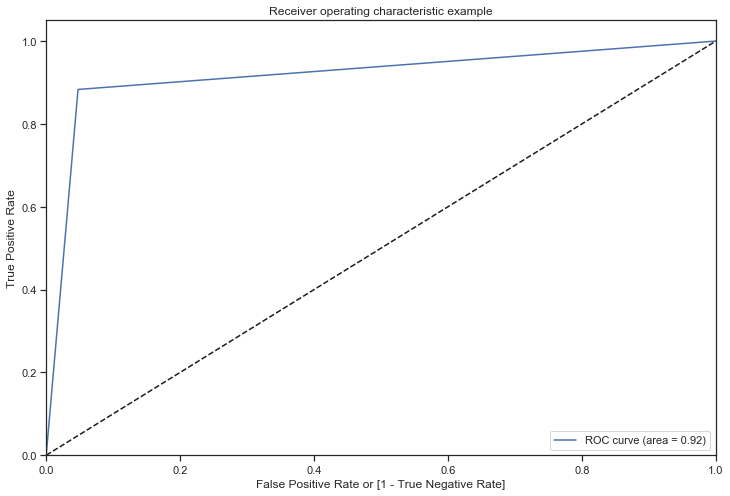

(array([0.        , 0.04752604, 1.        ]),
 array([0.        , 0.88323353, 1.        ]),
 array([2, 1, 0]))

In [62]:
draw_roc(y_pred_final['Converted'], y_pred_final['Predicted'])


In [63]:
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final['Converted'], y_pred_final['Predicted']))


'0.92'

#### We see an overall AUC score of 0.92 looks like we did a decent job.

> # <font color=blue> 8. PCA </font>

In [64]:
X_train.shape

(5921, 161)

In [65]:
pca=PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

## 8.1. Components for  PCA

In [66]:
pca.components_

array([[ 3.07475066e-03, -1.55519146e-04,  1.01918762e-03, ...,
         4.34704200e-01, -4.66743371e-01, -4.33010600e-01],
       [-6.66733117e-03,  1.54400841e-04,  9.12684886e-04, ...,
         3.93369403e-01,  4.74439327e-01,  5.03384397e-01],
       [-1.88769589e-02,  1.93435556e-04, -1.49758556e-03, ...,
        -2.85357361e-01,  6.46780207e-03,  9.93445523e-03],
       ...,
       [-0.00000000e+00, -3.49631680e-16,  5.24496527e-17, ...,
         6.93889390e-18, -9.02056208e-17,  7.97972799e-17],
       [ 0.00000000e+00, -1.00113362e-16,  7.98618684e-17, ...,
        -5.20417043e-18, -3.46944695e-17,  2.42861287e-17],
       [ 0.00000000e+00, -4.55486064e-16,  2.07823117e-16, ...,
         0.00000000e+00, -1.38777878e-17,  6.93889390e-18]])

## 8.2. Explained Variance Ratio

In [67]:
pca.explained_variance_ratio_

array([2.29496777e-01, 2.06349333e-01, 7.97349887e-02, 5.72975251e-02,
       4.80228637e-02, 4.12211649e-02, 3.23286076e-02, 2.55929175e-02,
       2.48860738e-02, 1.89545552e-02, 1.38893015e-02, 1.26301261e-02,
       1.10800698e-02, 1.04875246e-02, 1.01648573e-02, 9.39280979e-03,
       9.22392523e-03, 8.90549863e-03, 8.36607316e-03, 8.22913274e-03,
       7.49905333e-03, 7.27571365e-03, 6.91010859e-03, 6.52057945e-03,
       5.71634003e-03, 5.20640373e-03, 5.16118764e-03, 5.07906572e-03,
       4.49770714e-03, 4.20836453e-03, 4.11654686e-03, 3.89753448e-03,
       3.81523438e-03, 3.24285104e-03, 3.03161881e-03, 2.87885810e-03,
       2.77296368e-03, 2.61780066e-03, 2.56625159e-03, 2.32036911e-03,
       2.21350119e-03, 2.13812633e-03, 2.05354530e-03, 1.99736341e-03,
       1.93534839e-03, 1.85054688e-03, 1.78472465e-03, 1.74040027e-03,
       1.61199191e-03, 1.53607299e-03, 1.48965826e-03, 1.43743379e-03,
       1.38400746e-03, 1.29101873e-03, 1.28759687e-03, 1.17070412e-03,
      

In [68]:
pca.explained_variance_ratio_.max()

0.22949677657380485

## 8.3. Perform Scree Plot

In [69]:
#perfming cumulative variable creation
var_cumu = np.cumsum(pca.explained_variance_ratio_)

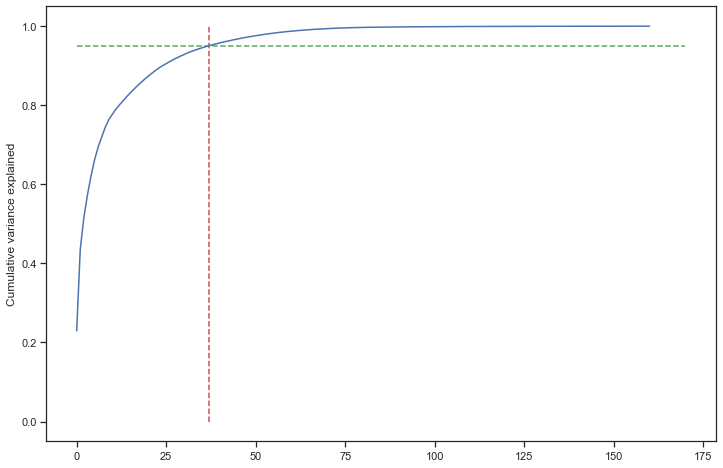

In [70]:
#Scree plot
plt.figure(figsize=(12,8))
plt.vlines(x=37, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=170, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## 8.4. Perform PCA with 37 components

In [71]:
pca_final = IncrementalPCA(n_components=37)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(5921, 37)

In [72]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(37, 37)

## 8.5. Plotting the heatmap of the corr matrix

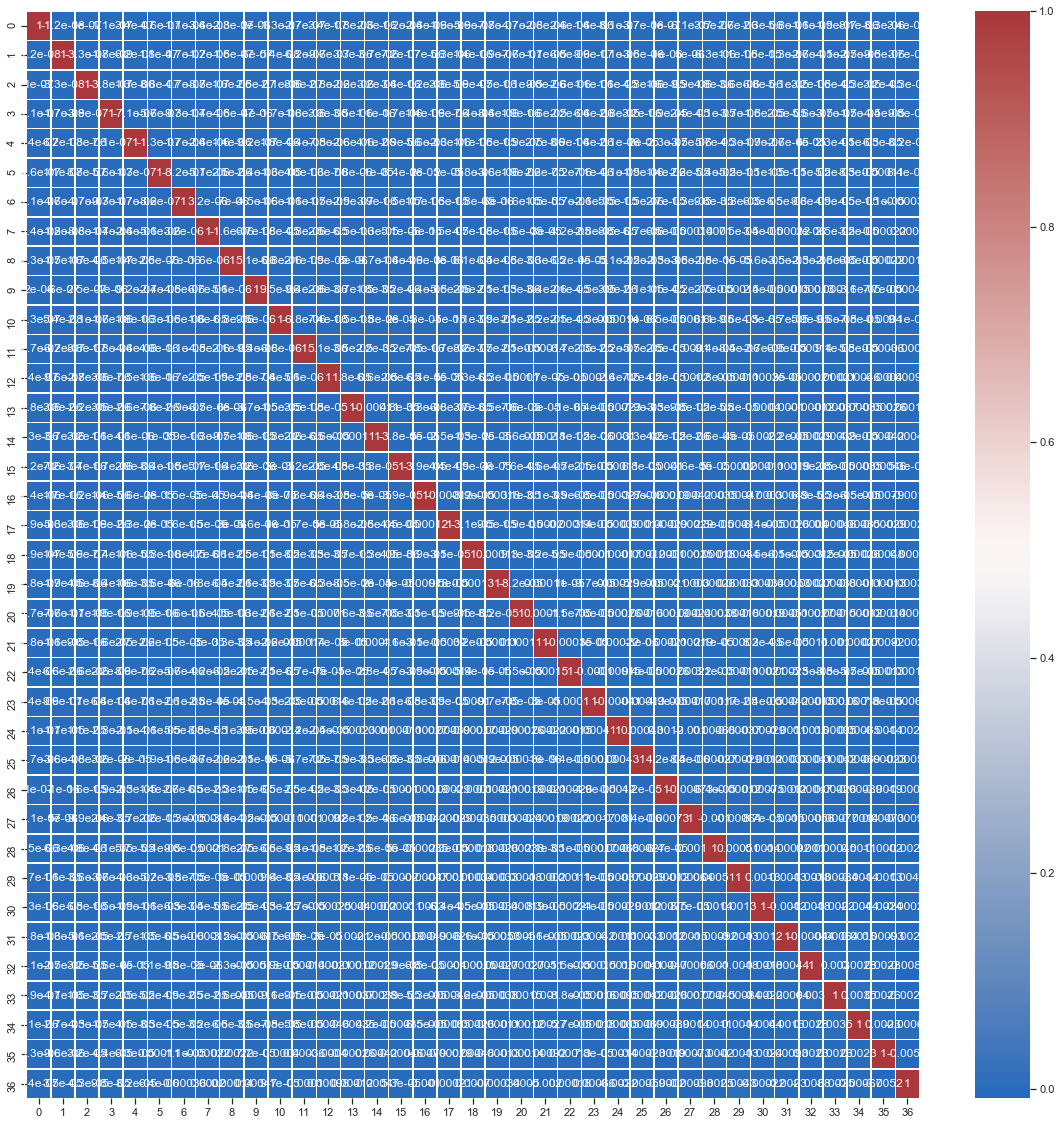

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, cmap='vlag', annot=True, linewidths=.5)

In [74]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2538, 37)

## 8.6. Applying Logistic regression in the Data on out Principle components

In [75]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

#### Model prediction on the test dataset

In [76]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
pred_probs_test

array([[1.89530889e-04, 9.99810469e-01],
       [9.73778365e-01, 2.62216354e-02],
       [8.88737845e-01, 1.11262155e-01],
       ...,
       [9.23738055e-01, 7.62619446e-02],
       [9.49176288e-01, 5.08237119e-02],
       [4.66173283e-01, 5.33826717e-01]])

In [77]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.96'

#### We see an overall score of 0.96 looks like we did a decent job

## 8.7. PCA unsupervised

In [78]:
pca_again = PCA(0.9)
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(5921, 25)

In [79]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2538, 25)

In [80]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.95'

#### PCA is great!

In [90]:
y_test_df

,Converted,Lead Number
0,1,7662
1,0,4834
2,0,3925
3,0,5231
4,0,4442
5,1,7093
6,0,338
7,0,7465
8,0,2637
9,1,6141
